# Analyse FUCCI data

Analyse FUCCI fluorescence data exported by TrackMate

We begin by importing the necessary packages:

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

We then define some variables we'll be using later:

In [14]:
colors = ('blue', 'grey', 'orange')
frame_duration = 2

Next we define a function that we will use to detect a drop in fluorescence intensity:

In [15]:
def find_steep_fall_frame(intensity_values, threshold=0.05, window=50):
    max_fall = 0
    fall_frame = None

    for i in range(len(intensity_values) - window):
        fall = (intensity_values[i] - intensity_values[i + window]) / intensity_values[i]
        if fall > max_fall:
            max_fall = fall
            fall_frame = i

    if max_fall >= threshold:
        return fall_frame
    else:
        return None

The `file_paths` variables holds the paths to all the source data we want to analyse, while the `frame_differences_all` variables will hold the resultant data that we are interested in plotting:

In [16]:
file_paths = (
    'Z:/working/Training/2024-Crick Microscopy Course/Live imaging/trial data/Prelim_analysis_2/Pos0/FUCCI_LEDpower_Jul24_2_MMStack_Pos0_spots.csv',
    'Z:/working/Training/2024-Crick Microscopy Course/Live imaging/trial data/Prelim_analysis_2/Pos4/FUCCI_LEDpower_Jul24_2_MMStack_Pos4_spots.csv',
    'Z:/working/Training/2024-Crick Microscopy Course/Live imaging/trial data/Prelim_analysis_2/Pos7/FUCCI_LEDpower_Jul24_2_MMStack_Pos7_spots.csv')

frame_differences_all = []

The following loop does a number of things:
1. For each file path specified above, the dataset is read and relevant intensity data extracted
2. Within the next `for` loop, drops in fluorescence intensity are detected in each channel and the time difference between these drops calculated
3. Some summary statistics on the frame difference data is printed to the console

In [17]:
for i in range(len(file_paths)):
    data = pd.read_csv(file_paths[i], skiprows=[1, 2, 3])
    data.sort_values(by=['TRACK_ID', 'FRAME'], ignore_index=True, inplace=True)
    intensity_data = data[['FRAME', 'TRACK_ID', 'MEAN_INTENSITY_CH2', 'MEAN_INTENSITY_CH3']]
    unique_tracks = intensity_data['TRACK_ID'].unique()
    frame_differences = []
    
    for track in unique_tracks:
        track_data = intensity_data[intensity_data['TRACK_ID'] == track]
        frames = track_data['FRAME'].values
        intensity_values_C2 = track_data['MEAN_INTENSITY_CH2'].values
        intensity_values_C3 = track_data['MEAN_INTENSITY_CH3'].values
        fall_frame_C3 = find_steep_fall_frame(intensity_values_C3)
        fall_frame_C2 = find_steep_fall_frame(intensity_values_C2)

        if fall_frame_C3 is not None and fall_frame_C2 is not None:
            frame_difference = (frames[fall_frame_C2] - frames[fall_frame_C3]) * frame_duration
            if frame_difference >= 0:
                frame_differences.append(frame_difference)

    frame_differences_all.append(frame_differences)

    print(f"Mean Frame Difference (Pos {i}): {np.mean(frame_differences):.2f}")
    print(f"Median Frame Difference (Pos {i}): {np.median(frame_differences):.2f}")
    print(f"Standard Deviation of Frame Difference (Pos {i}): {np.std(frame_differences):.2f}")

Mean Frame Difference (Pos 0): 294.59
Median Frame Difference (Pos 0): 290.00
Standard Deviation of Frame Difference (Pos 0): 173.48
Mean Frame Difference (Pos 1): 231.00
Median Frame Difference (Pos 1): 235.00
Standard Deviation of Frame Difference (Pos 1): 155.97
Mean Frame Difference (Pos 2): 252.43
Median Frame Difference (Pos 2): 161.00
Standard Deviation of Frame Difference (Pos 2): 269.16


Finally, we plot the resulting distributions:

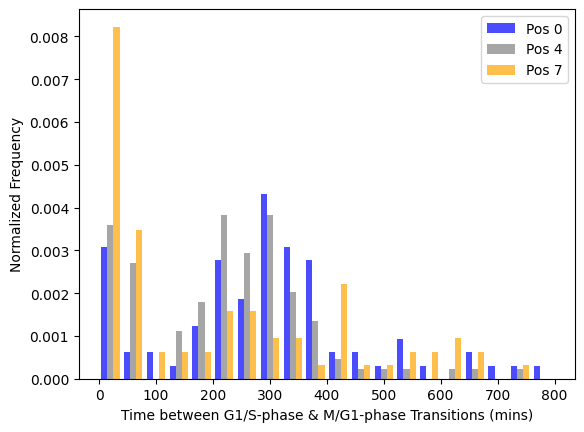

In [18]:
%matplotlib inline
#plt.figure(figsize=(12, 6))
plt.hist(frame_differences_all, bins=20, range=(0, 800), color=colors, alpha=0.7, density=True,
         label=[f'Pos {i}' for i in (0, 4, 7)])
plt.xlabel('Time between G1/S-phase & M/G1-phase Transitions (mins)')
plt.ylabel('Normalized Frequency')
plt.legend()
plt.show()